<a href="https://colab.research.google.com/github/anaazzahra/MINPRO3_Predict-Customer-Personality-to-boost-marketing-campaign-by-using-Machine-Learning/blob/main/boost_marketing_campaign_predict_customer_personality_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Connecting to data source
from google.colab import drive
drive.mount('/content/drive')

#Load data
df = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/DS JAP/miniproject/minpro3/marketing_campaign_data.csv')

Mounted at /content/drive


In [ ]:
#Load Data
df.head(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info() #Checking data type and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
#Changing Dt_Customer's data type from object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


In [ ]:
#Deleting Unnamed column due to will not be used.
df.drop(columns=['Unnamed: 0'], inplace=True)

# **TASK 1**

## **Calculate Conversion Rate**

In [ ]:
df['Conversion_Rate'] = df['Response']/df['NumWebVisitsMonth']

## **Create Feature Representative**

In [ ]:
#number of children
df['total_children'] = df['Kidhome'] + df['Teenhome']

#number of transaction
df['total_purchases'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']

#number of expenditure
df['total_spending'] = df['MntCoke'] + df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

## **Create Age Category**

In [ ]:
#Age Calculation.
df['age_cust'] = datetime.now().year - df['Year_Birth'] #Getting customers's age

In [ ]:
#Age categorization based on age clasification from Ministry of Health Republic Indonesia
bins = [19, 44, 59, 75, float('inf')]
labels = ['young', 'adult', 'old', 'oldest']

df['age_category'] = pd.cut(df['age_cust'], bins=bins, labels=labels, right=False)

In [ ]:
#to know range of age categories
age_and_category = df.groupby('age_category')['age_cust'].agg(['min', 'max'])
print(age_and_category)

              min  max
age_category          
young          28   43
adult          44   58
old            59   74
oldest         75  131


In [ ]:
total_customers_category = df['age_category'].value_counts()
print(total_customers_category)

age_category
adult     995
old       750
young     385
oldest    110
Name: count, dtype: int64


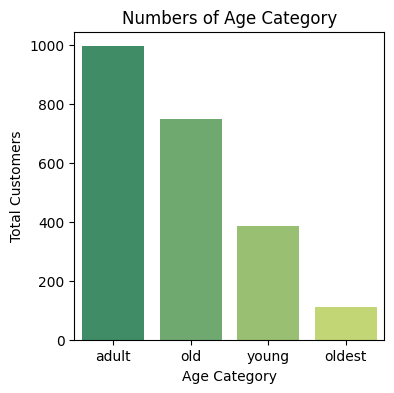

In [ ]:
#Visualization of age category
#1. setting size
plt.figure(figsize=(4,4))

#2. Initiate plot types and data sources
order=total_customers_category.index
sns.barplot(x=total_customers_category.index, y=total_customers_category.values, order=order, palette='summer')

#3.Initiate plot title and label
plt.title('Numbers of Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Customers')

#4. show the plot
plt.show()

## **Conversion Rate and Age Category**

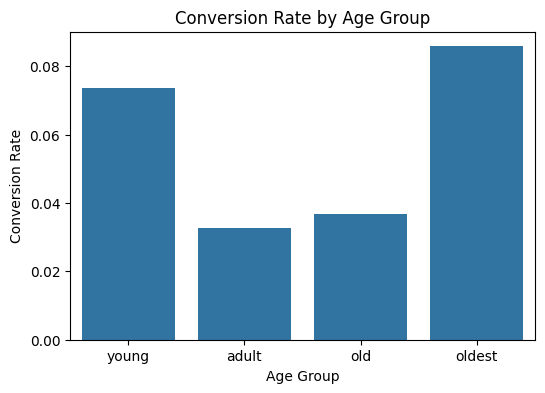

In [ ]:
# Visualisasi bar plot untuk conversio rate dab age category
plt.figure(figsize=(6, 4))
sns.barplot(x='age_category', y='Conversion_Rate', data=df, ci=None)

# Memberikan judul dan label sumbu
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')

# Menampilkan plot
plt.show()

## **Conversion Rate and Income**

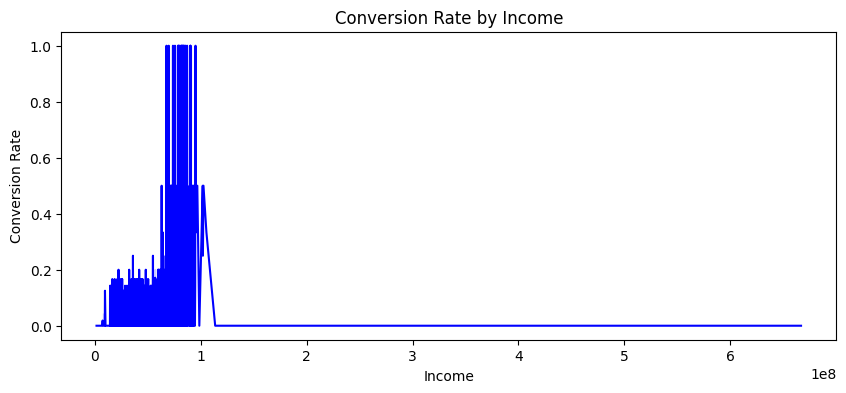

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Income', y='Conversion_Rate', data=df, color='blue')

plt.title('Conversion Rate by Income')
plt.xlabel('Income')
plt.ylabel('Conversion Rate')
plt.show()

## **Conversion Rate and Spending**

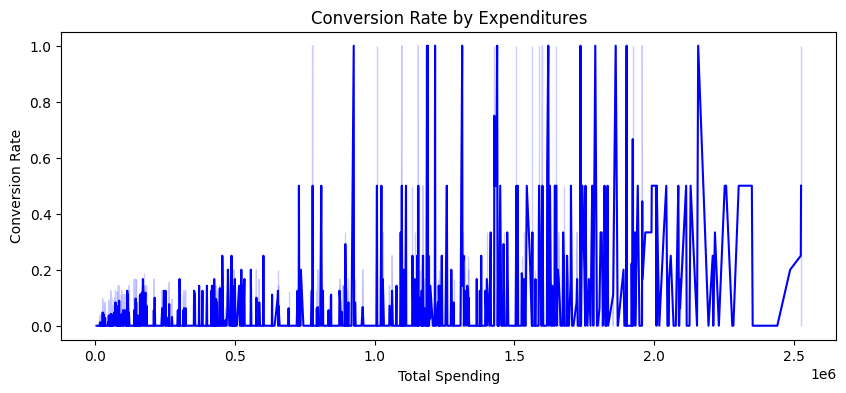

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='total_spending', y='Conversion_Rate', data=df, color='blue')

plt.title('Conversion Rate by Expenditures')
plt.xlabel('Total Spending')
plt.ylabel('Conversion Rate')
plt.show()

## **Data Insight**

# **TASK 2: DATA PRE-POCESSING**

## **Handling Missing Value**

In [ ]:
#Checking missing value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Conversion_Rate        11
total_children          0
total_purchases         0
total_spending          0
age_cust                0
age_category            0
dtype: int64

In [ ]:
#handling missing value
#column income
df['Income'] = df['Income'].fillna(df['Income'].median())

#conversion rate
df['Conversion_Rate'].fillna(value = 0, inplace = True)

In [ ]:
#re-checking missing value
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Conversion_Rate        0
total_children         0
total_purchases        0
total_spending         0
age_cust               0
age_category           0
dtype: int64

## **Handling Duplicated Data**

In [ ]:
df.duplicated().sum()

0

## **Feature Encoding**

In [ ]:
#Feature encoding for categorical data
# label encoding
#Kolom Education
education = {'SMA':1, 'D3':2, 'S1':3, 'S2':4, 'S3':5}
df['Education'] = df['Education'].map(education)

#Kolom Marital Status
status = {'Menikah': 1, 'Bertunangan':2, 'Lajang':3, 'Cerai':4, 'Janda':5, 'Duda':6}
df['Marital_Status'] = df['Marital_Status'].map(status)

#Kolom Age Category
umur = {'young':1, 'adult':2, 'old':3, 'oldest':4}
df['age_category'] = df['age_category'].map(umur)

In [ ]:
df['age_category'] = pd.to_numeric(df['age_category'])

In [ ]:
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,total_children,total_purchases,total_spending,age_cust,age_category
654,3277,1955,3,4,49431000.0,0,1,2012-08-03,9,219000,...,0,3,11,0,0.0,1,15,365000,69,3
978,3308,1952,3,1,35704000.0,1,1,2014-01-03,54,30000,...,0,3,11,0,0.0,2,9,94000,72,3
1647,7005,1981,3,3,58684000.0,0,0,2014-06-16,71,479000,...,0,3,11,0,0.0,0,21,813000,43,1


## **Feature Standarization**

In [ ]:
#import library for standarization
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Replace infinite or extremely large values with NaN
df = df.replace([np.inf, -np.inf], np.nan)

In [ ]:
df = df.dropna() #deleting nan pada sintaks sebelumnya

In [ ]:
#Initiate scaler
scaler = StandardScaler()

# Fitting and data transformation
df_scaled = df.copy()

df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

df_scaled.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Complain,Z_CostContact,Z_Revenue,Response,Conversion_Rate,total_children,total_purchases,total_spending,age_cust,age_category
1947,-0.954165,0.433522,0.537521,-0.995354,1.264484,-0.825218,0.906934,2014-06-20,-0.867157,-0.258336,...,-0.097282,0.0,0.0,-0.418612,-0.304784,0.065928,0.929970,0.349106,-0.433522,-0.327754
1343,-1.028720,1.768926,-0.458383,-0.995354,-1.330636,-0.825218,-0.929894,2013-02-16,-1.177973,-0.808076,...,-0.097282,0.0,0.0,-0.418612,-0.304784,-1.264505,-1.154596,-0.864948,-1.768926,-1.582745
1979,1.639231,1.268149,0.537521,0.741765,-0.833041,1.032559,-0.929894,2012-12-05,0.237969,-0.894252,...,-0.097282,0.0,0.0,2.388846,0.571610,0.065928,-1.415167,-0.961275,-1.268149,-1.582745


# **TASK 3: MODELING DAN EVALUATION**

## **Feature Selection**

In [ ]:
df_new = df_scaled.drop(['Dt_Customer'], axis=1)

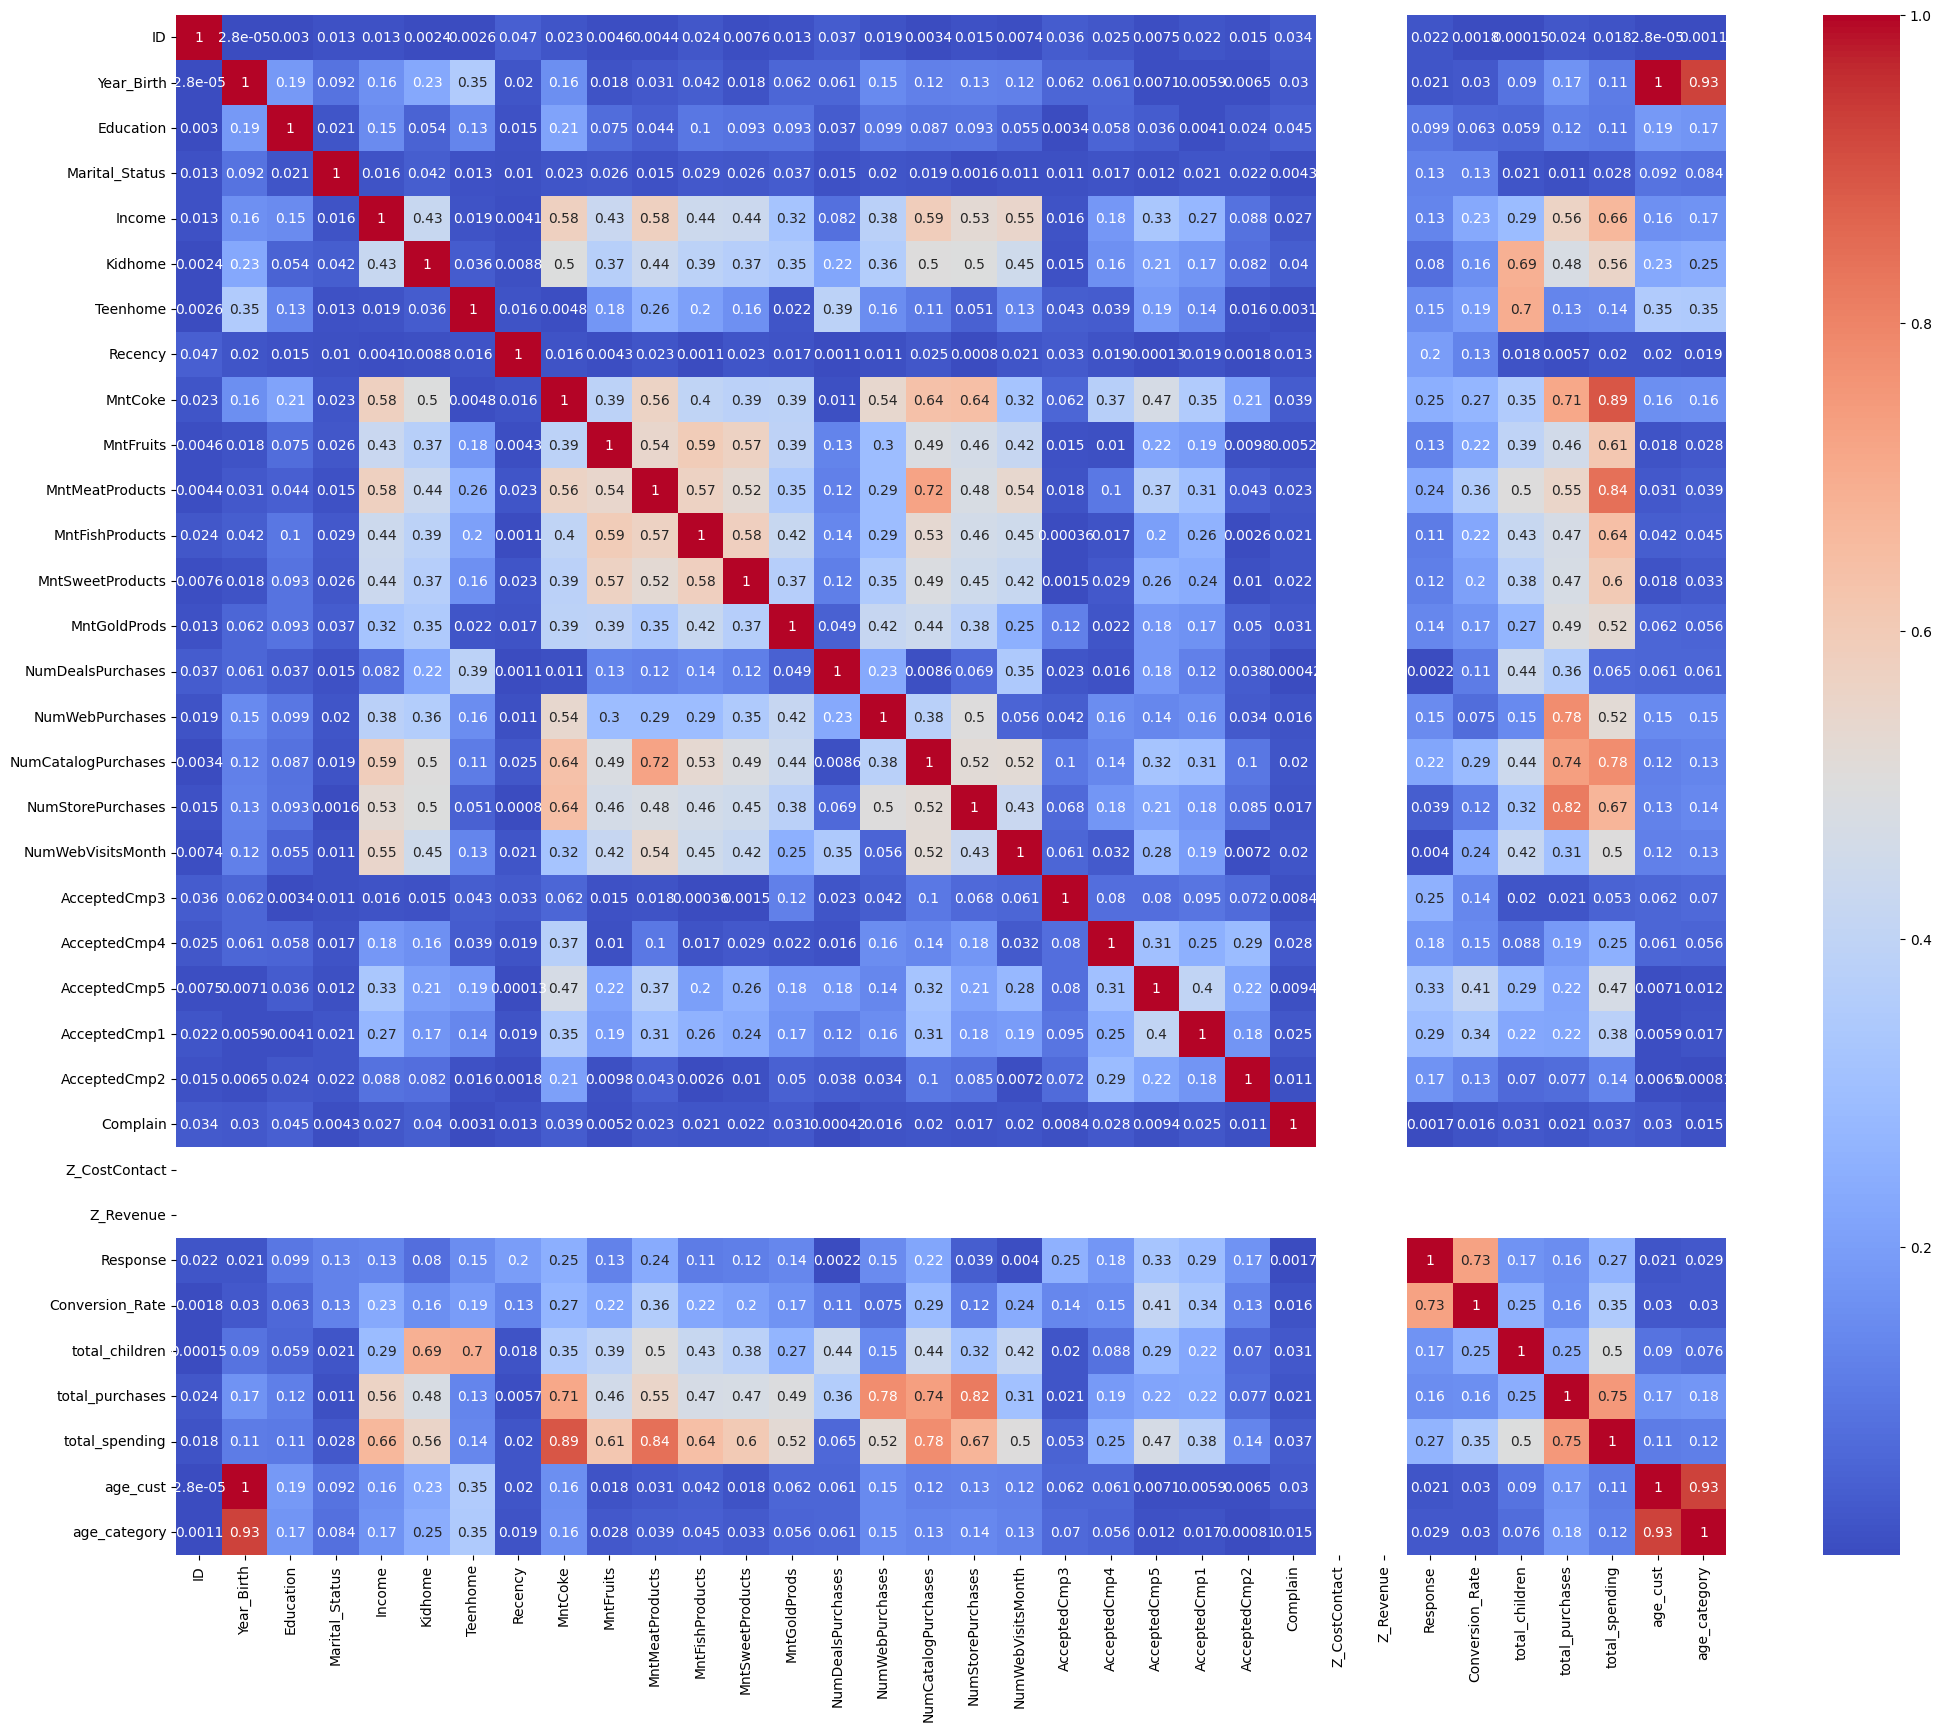

In [ ]:
#Feature Selection before Modeling
#Menggunakan heatmap
# Menghitung korelasi
corr_matrix = df_new.corr().abs()

# Membuat heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Notes:

Variabel yang dipilih harus relevan dengan tujuan clustering, yaitu mengelompokkan customer yang potensial menerima campaign dan melihat customer mana yang sama sekali tidak pernah menerima campaign. Fitur-fitur representatif yang dibuat sebelumnya memiliki korelasi yang tinggi dengan fitur aslinya mungkin tidak akan memberikan dampak apa-apa terhadap model, sehingga hanya perlu digunakan salah satu saja.

In [ ]:
#Feature Selection WITH RFE

df2 = df_new.copy()

df_model= df2.drop(['Year_Birth', 'ID', 'Teenhome', 'Kidhome'], axis=1)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   float64
 1   Marital_Status       2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   MntCoke              2240 non-null   float64
 5   MntFruits            2240 non-null   float64
 6   MntMeatProducts      2240 non-null   float64
 7   MntFishProducts      2240 non-null   float64
 8   MntSweetProducts     2240 non-null   float64
 9   MntGoldProds         2240 non-null   float64
 10  NumDealsPurchases    2240 non-null   float64
 11  NumWebPurchases      2240 non-null   float64
 12  NumCatalogPurchases  2240 non-null   float64
 13  NumStorePurchases    2240 non-null   float64
 14  NumWebVisitsMonth    2240 non-null   float64
 15  AcceptedCmp3         2240 non-null   f

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Memisahkan fitur dan target
X = df_model.drop('Response', axis=1)
y = df_model['Response']

In [ ]:
# Inisialisasi model untuk RFE
model = LinearRegression()

# Inisialisasi RFE dengan model dan jumlah fitur yang ingin dipilih
rfe = RFE(model, n_features_to_select=7)

# Melatih RFE pada data
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [ ]:
# Mengambil indeks fitur terpilih
selected_features = rfe.support_

# Mengambil nama fitur terpilih
selected_feature_names = X.columns[selected_features]

In [ ]:


# Menampilkan fitur terpilih
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Recency', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'Conversion_Rate'],
      dtype='object')


## **Modeling**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df_training = df_model.copy()

In [ ]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_training)
    inertia.append(kmeans.inertia_)

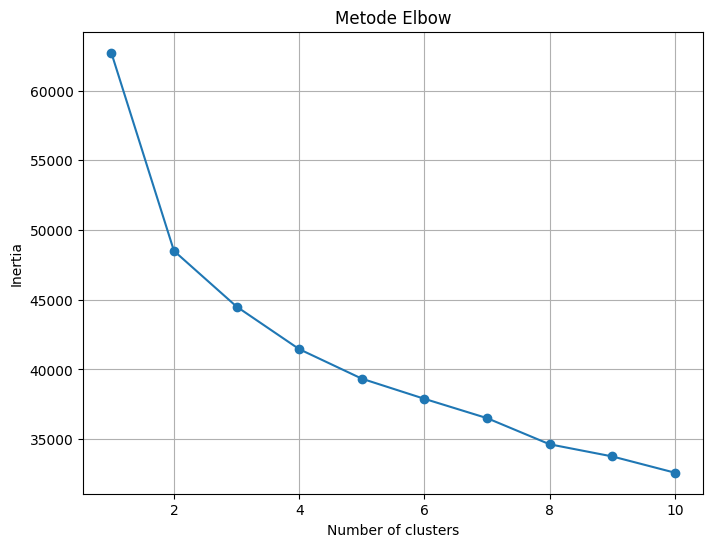

In [ ]:
# Plot Metode Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# Calculate inertia decrease in each step
percentage_decrease = (pd.Series(inertia) - pd.Series(inertia).shift(-1))/pd.Series(inertia)*100

for i in range(len(np.diff(inertia))):
    print(f"Clusters: {i + 2}, Percentage Decrease: {percentage_decrease[i]:.2f}%")

Clusters: 2, Percentage Decrease: 22.67%
Clusters: 3, Percentage Decrease: 8.24%
Clusters: 4, Percentage Decrease: 6.86%
Clusters: 5, Percentage Decrease: 5.11%
Clusters: 6, Percentage Decrease: 3.67%
Clusters: 7, Percentage Decrease: 3.66%
Clusters: 8, Percentage Decrease: 5.14%
Clusters: 9, Percentage Decrease: 2.51%
Clusters: 10, Percentage Decrease: 3.46%


In [ ]:
#K-Means Cluster
kmeans = KMeans(n_clusters=2, max_iter=300, random_state=10)
kmeans.fit(df_training)
df_training['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [ ]:
display(df_training.groupby('cluster').agg(['mean','median']))

Education           Marital_Status              Income            \
             mean    median           mean    median      mean    median   
cluster                                                                    
0       -0.054334 -0.458383      -0.031520 -0.126794 -0.532390 -0.551086   
1        0.079559 -0.458383       0.046153 -0.126794  0.779551  0.756022   

          Recency             MntCoke            ... total_children            \
             mean    median      mean    median  ...           mean    median   
cluster                                          ...                            
0       -0.006112 -0.003777 -0.616427 -0.802133  ...       0.394788  0.065928   
1        0.008950  0.065293  0.902601  0.766857  ...      -0.578066 -1.264505   

        total_purchases          total_spending            age_cust            \
                   mean   median           mean    median      mean    median   
cluster                                                                         
0             -0.614563 -0.76374      -0.710697 -0.858305 -0.107070 -0.266596   
1              0.899871  0.92997       1.040636  0.935373  0.156777  0.150717   

        age_category            
                mean    median  
cluster                         
0          -0.110889 -0.327754  
1           0.162369 -0.327754  

[2 rows x 60 columns]

## **Model Evaluation**

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
range_n_clusters = list(range(2,9))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_training)
    preds = kmeans.predict(df_training)

    score_euclidean = silhouette_score(df_training, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

Text(0.5, 1.0, 'Silhouette Score')

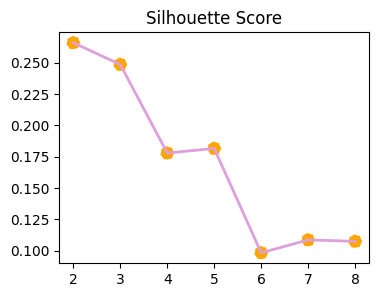

In [ ]:
plt.figure(figsize=(4,3))
sns.lineplot(x=range(2,9), y=arr_silhouette_score_euclidean, color='plum', linewidth = 2)
sns.scatterplot(x=range(2,9), y=arr_silhouette_score_euclidean, s=100, color='orange',  linestyle='--')

plt.title('Silhouette Score')

# **Analysis**

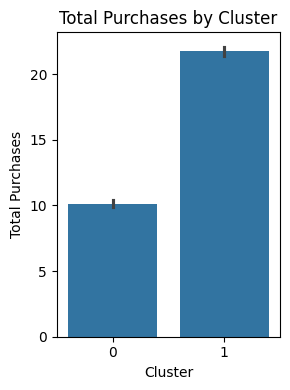

In [ ]:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='cluster', y='total_purchases')

plt.xlabel('Cluster')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Cluster')
plt.tight_layout()
plt.show()

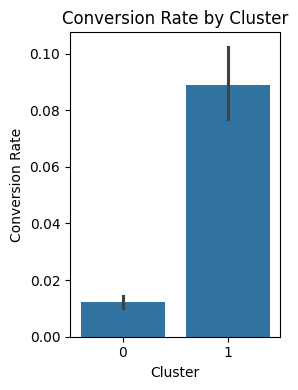

In [ ]:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='cluster', y='Conversion_Rate')

plt.xlabel('Cluster')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Cluster')
plt.tight_layout()
plt.show()

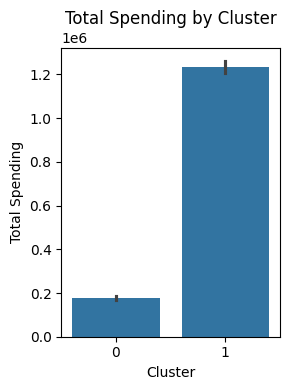

In [ ]:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='cluster', y='total_spending')

plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.title('Total Spending by Cluster')
plt.tight_layout()
plt.show()

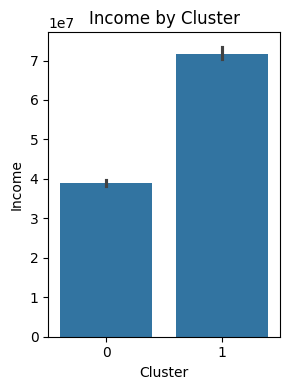

In [ ]:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='cluster', y='Income')

plt.xlabel('Cluster')
plt.ylabel('Income')
plt.title('Income by Cluster')
plt.tight_layout()
plt.show()

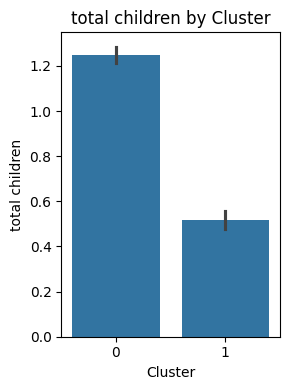

In [ ]:
plt.figure(figsize=(3, 4))
sns.barplot(data=df, x='cluster', y='total_children')

plt.xlabel('Cluster')
plt.ylabel('total children')
plt.title('total children by Cluster')
plt.tight_layout()
plt.show()

Karakteristik

Cluster 0 (Doni):

- Conversion dan Income yang rendah
- Total pembelian yang rendah
- Memilki total children yang tinggi

Cluster 1 (Dina):

- Memiliki angka conversion rate yang tinggi
- Income dan spending yang cukup tinggi
- Total Children lebih sedikit

Rekomendasi

Cluster 0 (Doni):

- Menawarkan paket khusus keluarga yang melibatkan produk kebutuhan sehari-hari, seperti protein (daging)

- Membuat program rewarding setiap transaksi. Contoh: setiap transaksi yang dilakukan, diberikan poin untuk nanti bisa ditukarkan jika sudah mencapai nilai yang ditentukan

- Menawarkan opsi pembayaran yang lebih fleksibel, seperti cicilan tanpa bunga (dengan catatan adanya pembatasan limit pembelian) atau pembayaran melalui aplikasi e-wallet dengan cashback


Cluster 1 (Dina):

- Membuat program keanggotaan yang memberikan manfaat eksklusif, seperti akses prioritas, diskon khusus, atau layanan pelanggan premium. Contoh: Keanggotaan VIP yang memberikan diskon 10% setiap pembelian, akses awal ke produk baru, dan customer service 24/7.

- Menawarkan produk dan layanan premium yang sesuai dengan penghasilan tinggi.